# Building an Image Classifier Using the Sequential API

## Using Keras to load the dataset

In [1]:
# Import required packages
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

# Split the training set into a smaller training set and a validation set
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [2]:
# Each pixel intensity is represented as a byte (0 to 255)
X_train.dtype

dtype('uint8')

In [3]:
# scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

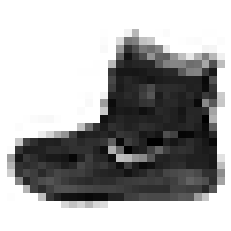

In [4]:
# Plot an image using matplotlib's imshow() function, with a 'binary' color map
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [5]:
# labels are the class IDs (represented as uint8), from 0 to 9
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [6]:
# corresponding class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Ankle boot'

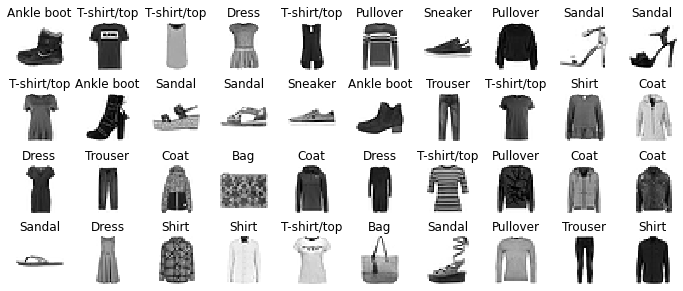

In [7]:
# Set the number of rows and columns for the plot
n_rows = 4
n_cols = 10

# Set the size of the figure
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

# Loop through each row and column and plot the corresponding image
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col  # Calculate the index of the image to plot
        plt.subplot(n_rows, n_cols, index + 1)  # Select the appropriate subplot
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")  # Display the image
        plt.axis('off')  # Remove the axes
        plt.title(class_names[y_train[index]])  # Add the corresponding class name as title

# Adjust the spacing between the subplots and display the plot
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Creating the model using the Sequential API

In [8]:
# Set the random seed to 42 for reproducibility
tf.random.set_seed(42)

# Define a sequential model with a flatten layer to convert the input shape to 1D,
# two dense layers with ReLU activation function and a final dense layer with softmax activation function
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [9]:
# Prints a summary of the model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


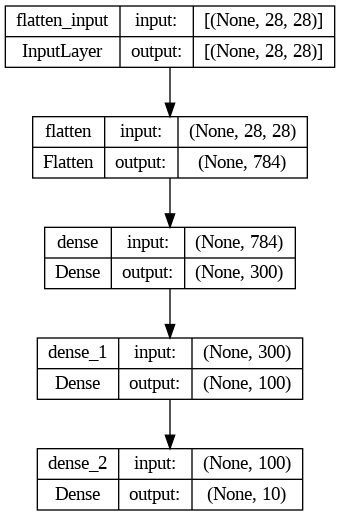

In [10]:
# Plot the model's architecture
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

## Compiling the model

In [11]:
# Compiles the model with Sparse Categorical Crossentropy as the loss function, 
# Stochastic Gradient Descent as the optimizer, and Sparse Categorical Accuracy as the evaluation metric.
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy, 
    optimizer=tf.keras.optimizers.SGD(), 
    metrics=[tf.keras.metrics.sparse_categorical_accuracy]
)

## Training and evaluating the model

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7217 - sparse_categorical_accuracy: 0.7668 - val_loss: 0.5033 - val_sparse_categorical_accuracy: 0.8276
Epoch 2/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4859 - sparse_categorical_accuracy: 0.8328 - val_loss: 0.4654 - val_sparse_categorical_accuracy: 0.8346
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4398 - sparse_categorical_accuracy: 0.8455 - val_loss: 0.4225 - val_sparse_categorical_accuracy: 0.8498
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4148 - sparse_categorical_accuracy: 0.8564 - val_loss: 0.3964 - val_sparse_categorical_accuracy: 0.8618
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3941 - sparse_categorical_accuracy: 0.8618 - val_loss: 0.3912 - val_sparse_categorical_accuracy: 0.8602
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3777 - sp

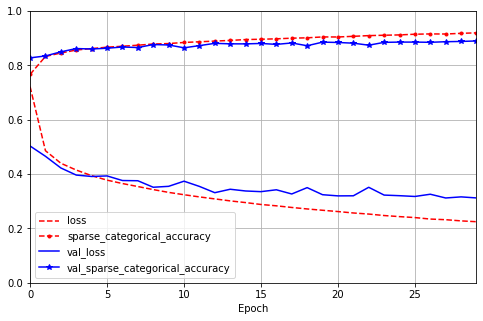

In [13]:
# Creates a plot of the training history of the model
# Plots the history dataframe as a line chart with red dashed line for training loss, red dotted line for validation loss, blue solid line for training accuracy, and blue starred line for validation accuracy
# Sets the figure size to 8x5 and the limits of the x and y axis to 0-29 and 0-1, respectively
# Adds gridlines to the plot and sets the x-axis label to "Epoch"
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])

# Adds a legend to the plot with the location set to "lower left"
plt.legend(loc="lower left")

# Displays the plot
plt.show()

In [14]:
# Evaluate the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3246 - sparse_categorical_accuracy: 0.8855


[0.3245515823364258, 0.8855000138282776]

## Using the model to make predictions

In [15]:
# Selects the first three instances from the test set and assigns them to X_new
X_new = X_test[:3]

# Uses the trained model to predict the probabilities of each class for the instances in X_new and assigns the results to y_proba
y_proba = model.predict(X_new)

# Rounds the probabilities in y_proba to two decimal places and displays the results
y_proba.round(2)

1/1 [==============================] - 0s 105ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [16]:
# Finds the index of the highest probability for each instance in y_proba 
# along the last axis and assigns the resulting array to y_pred
y_pred = y_proba.argmax(axis=-1)

# Displays the array y_pred
y_pred

array([9, 2, 1])

In [17]:
# Creates a numpy array from the list of class names and uses y_pred to index it and 
# get the corresponding class names for each predicted label
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

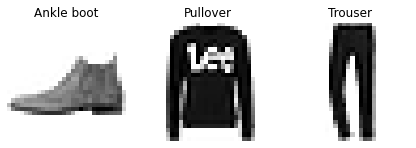

In [18]:
# Creates a figure with a size of 7.2x2.4 inches
plt.figure(figsize=(7.2, 2.4))

# Iterates over the images in X_new, adding each image and its corresponding title to a subplot
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])

# Adjusts the spacing between subplots horizontally and vertically
plt.subplots_adjust(wspace=0.2, hspace=0.5)

# Displays the plot
plt.show()